In [1467]:
import math
import point_similarity as ps
import scipy.integrate as integrate
import pylab
import mpmath
from scipy.misc import derivative
import plotly
from plotly import graph_objs as go
import sys

In [1454]:
def calc_coeff(G, x, y, p, q):
    b = ((q - y - G*(p*p - x*x))/(p-x))
    c = (q - G*p*p - b*p)

    # assert (G * x * x) + (b * x) + c == y
    # assert (G * p * p) + (b * p) + c == q
    
    return b, c

In [1455]:
calc_coeff(0, 4, 7.5, 7, 2)

(-1.8333333333333333, 14.833333333333332)

In [1524]:
def curve_length(G, x0, y0, p, q):        
    b, c = calc_coeff(G, x0, y0, p, q)
    def differential(x):
        return pylab.sqrt(1 + (2*G*x + b)**2)
    curve, tolerance = integrate.quad(differential, min(x0, p), max(x0, p))
    return curve

In [1525]:
curve_length(0, 3.8, 7.4, 7, 2)

6.276941930590086

In [1526]:
def distance_from_base(root_distance, x, y, x1, y1):
    pair1 = [x, y]
    pair2 = [x1, y1]
    distance = math.dist(pair1, pair2)
    if(x,y) == (x1, y1):
        assert distance == 0
    return distance + root_distance

In [1527]:
distance_from_base(100, 3, 7, 3.8, 7.4)

100.89442719099992

In [1573]:
def total_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q):
    curve = curve_length(G, x1, y1, p, q)
    to_root = distance_from_base(root_distance, x0, y0, x1, y1)
    wiring = curve
    delay = (curve + to_root)
    cost = (alpha * wiring) +  ((1 - alpha) * delay)
    #print("curve = ", curve, "to root = " , to_root, "wiring = ", wiring, "delay = ", delay, "total cost = ", cost)
   # cost = curve + (1 - alpha) * distance_from_base(root_distance, x0, y0, x1, y1)
    return cost

In [1569]:
#for i in pylab.arange(3, 8, 0.01):
   # total_cost(0.8, 0, 0, 3, 7, i, 7, 7, 2)

In [1553]:
def length_func(x0, y0, x1, y1):
    length = pylab.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    return length

In [1554]:
def get_theta(x0, y0, x1, y1):
    theta = pylab.arctan((abs(y1 - y0)/abs(x1 - x0)))
    return theta

In [1611]:
def find_best_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q, fig):
    results = []
    min_t = 0
    delta = 0.01
    max_t = 1
    best_t = math.inf
    best_cost = math.inf
    l = length_func(x0, y0, x1, y1)
    theta = get_theta(x0, y0, x1, y1)
    x_opt = None
    y_opt = None
    for t in pylab.arange(min_t, max_t + delta, delta):
        new_x = x0 + t*l*cos(theta)
        new_y = y0 + t*l*sin(theta)
        x_curr = pylab.linspace(min(p, new_x), max(p, new_x))
        cost = total_cost(alpha, G, root_distance, x0, y0, new_x, new_y, p, q)
        if cost < best_cost:
            best_cost = cost
            best_t = t
            b, c = calc_coeff(G, new_x, new_y, p, q)
            x_opt = x_curr
            y_opt = G * x_opt ** 2 + b * x_opt + c
        
        if t % 0.2 == 0:
            b, c = calc_coeff(G, new_x, new_y, p, q)
            y_inter =  G * x_curr ** 2 + b * x_curr + c
            intermediate_line = go.Scatter(x = x_curr,y = y_inter, mode = "lines", name = str(cost))
            fig.add_trace(intermediate_line)
            
        results.append(cost)
    opt_line = go.Scatter(x = x_opt, y = y_opt, mode = "lines", name = "Optimal: " + str(best_cost))
    fig.add_trace(opt_line)
    return best_cost, best_t

In [1612]:

pt1 = [0, 0]
pt2 = [-5, 2]

p_pt = 7
q_pt = 2
G = 0
alpha = 0.5
Droot = 0
main = go.Scatter(x=pt1, y=pt2, name="main root segment")
pq = go.Scatter(x = [p_pt], y= [q_pt], name="(p,q)")

example_fig = go.Figure()
example_fig.add_trace(main)
example_fig.add_trace(pq)

find_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt, example_fig)
example_fig.update_layout(xaxis_range=[2.5, 6.5])
example_fig.update_layout(yaxis_range=[5.5, 8.5])
example_fig.show()

ZeroDivisionError: division by zero

In [1563]:
def get_length_and_theta(x0, y0, x1, y1):
    length = length_func(x0, y0, x1, y1)
    theta = get_theta(x0, y0, x1, y1)
    return length, theta

In [1604]:
def three_line_segments(alpha, G, root_distance, x0, y0, x1, y1, x2, y2, x3, y3, p, q, fig):
    min_t = 0
    delta = 0.01
    max_t = 1
    best_t = math.inf
    best_cost = math.inf
    s1 = find_best_cost(alpha, G, root_distance, x0, y0, x1, y1, p, q, fig)
    s2 = find_best_cost(alpha, G, root_distance, x1, y1, x2, y2, p, q, fig)
    s3 = find_best_cost(alpha, G, root_distance, x2, y2, x3, y3, p, q, fig)

    print(s1)
    print(s2)
    print(s3)

    return min(s1[0], s2[0], s3[0])

In [1607]:
three_line_segments(0, 0, 10, 0, 0, 0.1, 6, 0.3, 13, 0.2, 19, 7, 12, example_fig)

(23.892443989449802, 0.0)
(19.143850392476907, 0.0)
(16.77421582177598, 0.0)


16.77421582177598

(4.428317965096906, 1.0)
(1.7850086834522678, 0.58)
(3.448187929913334, 0.0)


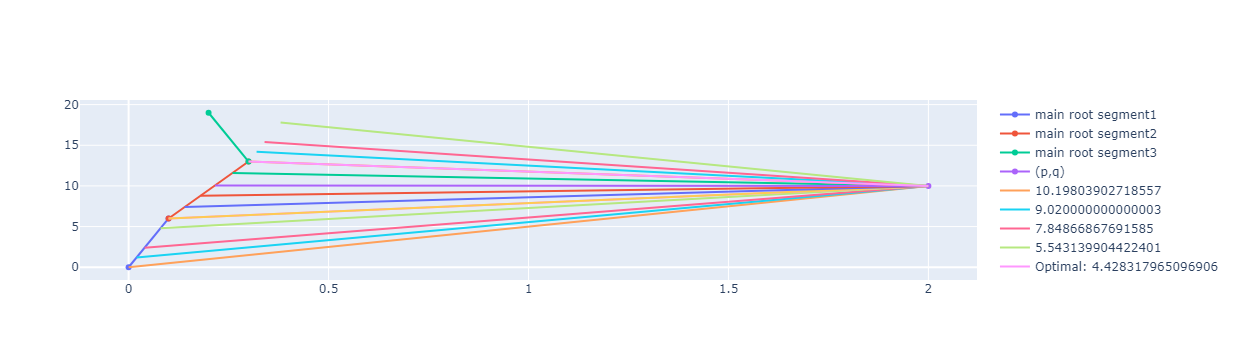

In [1616]:
pt1 = [0, 0.1]
pt2 = [0, 6]

pt3 = [0.1, 0.3]
pt4 = [6, 13]

pt5 = [0.3, 0.2]
pt6 = [13, 19]
p_pt = 2
q_pt = 10
G = 0
alpha = 0.5
Droot = 0
segment1 = go.Scatter(x=pt1, y=pt2, name="main root segment1")
segment2 = go.Scatter(x=pt3, y=pt4, name="main root segment2")
segment3 = go.Scatter(x=pt5, y=pt6, name="main root segment3")
pq = go.Scatter(x = [p_pt], y= [q_pt], name="(p,q)")

example_fig = go.Figure()
example_fig.add_trace(segment1)
example_fig.add_trace(segment2)
example_fig.add_trace(segment3)
example_fig.add_trace(pq)

# find_best_cost(alpha, G, Droot, pt1[0], pt2[0], pt1[1], pt2[1], p_pt, q_pt, example_fig)
three_line_segments(1, 0, 10, 0, 0, 0.1, 6, 0.3, 13, 0.2, 19, 2,10, example_fig)
example_fig.show()